In [478]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [479]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [480]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


society column has a lot of missing data. 

In [482]:
len(df['society'].unique())

2689

2689 unique society are there. considering this feature is not preferred. so this column can be dropped.

In [483]:
df_1=df.drop(['society'],axis=1)
df_1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [484]:
df_1.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

Comparing to the total data set size, null values are less. so these can be dropped.

In [485]:
df_1.dropna(axis=0, inplace=True)
df_1.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [486]:
df_1.shape

(12710, 8)

In [487]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [488]:
df_1['total_sqft'][1]

'2600'

 Checking the csv file, there are ranges in total_sqft column like '1900 - 2000', also some other formats are there. The data type should be changed as float, but some entries will not be able to convert directly as float. Ranges can be tokenized and changed as a number corresponding to the average of ther range.

In [489]:
#function to convert the range (eg:- 1500 - 1700) into float number, or if it is number return float value, since in df_1 it is string.
def range_to_num(x):
    token = x.split('-')
    if len(token)==2:
        num = (float(token[0])+float(token[1]))/2
        return num
    try:
        return float(x)
    except:
        return None
    
        

In [490]:
df_1['total_sqft']=df_1['total_sqft'].apply(lambda x: range_to_num(x))
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12668 non-null  float64
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


In [491]:
df_1.isnull().sum()

area_type        0
availability     0
location         0
size             0
total_sqft      42
bath             0
balcony          0
price            0
dtype: int64

In [492]:
df_1.dropna(axis=0,inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12668 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12668 non-null  object 
 1   availability  12668 non-null  object 
 2   location      12668 non-null  object 
 3   size          12668 non-null  object 
 4   total_sqft    12668 non-null  float64
 5   bath          12668 non-null  float64
 6   balcony       12668 non-null  float64
 7   price         12668 non-null  float64
dtypes: float64(4), object(4)
memory usage: 890.7+ KB


Price per sqft is an important measure in real estate. If it is considered, analysis can be done more easily, like finding out the outliers in the sense of the area and price, and number of bedrooms and the corresponfing total area etc. 

In [493]:
df_1['unit_price']=df_1['price']/df_1['total_sqft']
df_1.head()


,area_type,availability,location,size,total_sqft,bath,balcony,price,unit_price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,0.036998
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,0.046154
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,0.043056
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,0.062459
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0.042500


In [494]:
df_1['bedroom']=df_1['size'].apply(lambda x: int(x.split(' ')[0]))
df_1

,area_type,availability,location,size,total_sqft,bath,balcony,price,unit_price,bedroom
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,0.036998,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,0.046154,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,0.043056,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,0.062459,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0.042500,2
...,...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,0.065306,3
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,0.066898,5
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,0.052585,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,0.104073,4


In [495]:
df_2 = df_1.copy()
df_2.drop(['area_type','availability','size'],axis=1,inplace=True)

In [496]:
#sns.pairplot(df_2)

C:\Users\muafi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balcony', ylabel='unit_price'>

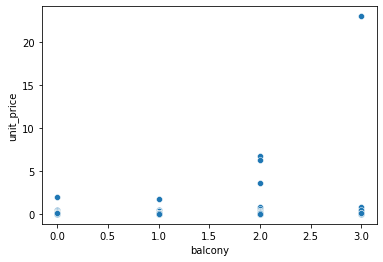

In [497]:
sns.scatterplot(df_2['balcony'],df_2['unit_price'])

balcony also can be dropped, to make the analysis simplified.

In [498]:
df_2.drop('balcony',axis=1,inplace=True)
df_2

,location,total_sqft,bath,price,unit_price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,0.036998,2
1,Chikka Tirupathi,2600.0,5.0,120.00,0.046154,4
2,Uttarahalli,1440.0,2.0,62.00,0.043056,3
3,Lingadheeranahalli,1521.0,3.0,95.00,0.062459,3
4,Kothanur,1200.0,2.0,51.00,0.042500,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,112.00,0.065306,3
13315,Whitefield,3453.0,4.0,231.00,0.066898,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,0.052585,2
13318,Padmanabhanagar,4689.0,4.0,488.00,0.104073,4


In [499]:
len(df_2['location'].unique())

1259

In [500]:
loc = df_2.groupby('location')['location'].agg('count')

In [501]:
df_2.groupby('location')['location'].agg('count').max()

513

In [502]:
loc=df_2.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc

location
Whitefield              513
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          259
Thanisandra             230
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1259, dtype: int64

In [503]:
less_data_loc=loc[loc<=50]
less_data_loc

location
Jalahalli               50
HSR Layout              49
Ramagondanahalli        48
Bhoganhalli             48
Gottigere               48
                        ..
Kalhalli                 1
Kalkere Channasandra     1
 Banaswadi               1
Kamdhenu Nagar           1
whitefiled               1
Name: location, Length: 1210, dtype: int64

In [504]:
df_2['location'] = df_2['location'].apply(lambda x: 'other' if x in less_data_loc else x)
len(df_2['location'].unique())

50

Location column should be changed as numerical vector. Outliers should be removed. 

In [505]:
df_2.head()

,location,total_sqft,bath,price,unit_price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,0.036998,2
1,other,2600.0,5.0,120.00,0.046154,4
2,Uttarahalli,1440.0,2.0,62.00,0.043056,3
3,other,1521.0,3.0,95.00,0.062459,3
4,Kothanur,1200.0,2.0,51.00,0.042500,2


In [506]:
df_2['bedroom'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [507]:
df_2[df_2['bedroom']>25]

,location,total_sqft,bath,price,unit_price,bedroom
1718,other,8000.0,27.0,230.0,0.02875,27
4684,other,2400.0,40.0,660.0,0.27500,43


In [508]:
8000/27

296.2962962962963

In [509]:
2400/43

55.81395348837209

In [510]:
df_3=df_2[~(df_2['bedroom']==43)]
df_3

,location,total_sqft,bath,price,unit_price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,0.036998,2
1,other,2600.0,5.0,120.00,0.046154,4
2,Uttarahalli,1440.0,2.0,62.00,0.043056,3
3,other,1521.0,3.0,95.00,0.062459,3
4,Kothanur,1200.0,2.0,51.00,0.042500,2
...,...,...,...,...,...,...
13314,other,1715.0,3.0,112.00,0.065306,3
13315,Whitefield,3453.0,4.0,231.00,0.066898,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,0.052585,2
13318,other,4689.0,4.0,488.00,0.104073,4


In [511]:
df_3.reset_index()
df_3

,location,total_sqft,bath,price,unit_price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,0.036998,2
1,other,2600.0,5.0,120.00,0.046154,4
2,Uttarahalli,1440.0,2.0,62.00,0.043056,3
3,other,1521.0,3.0,95.00,0.062459,3
4,Kothanur,1200.0,2.0,51.00,0.042500,2
...,...,...,...,...,...,...
13314,other,1715.0,3.0,112.00,0.065306,3
13315,Whitefield,3453.0,4.0,231.00,0.066898,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,0.052585,2
13318,other,4689.0,4.0,488.00,0.104073,4


In [512]:
df_3.describe()

,total_sqft,bath,price,unit_price,bedroom
count,12667.000000,12667.000000,12667.000000,12667.000000,12667.000000
mean,1511.765051,2.613326,105.908909,0.068746,2.733244
std,1162.116352,1.177989,131.726372,0.226337,1.148243
min,5.000000,1.000000,8.000000,0.002678,1.000000
25%,1100.000000,2.000000,49.010000,0.042426,2.000000
50%,1260.000000,2.000000,70.000000,0.053763,3.000000
75%,1640.000000,3.000000,115.000000,0.071429,3.000000
max,52272.000000,27.000000,2912.000000,23.000000,27.000000


abnormal: 5 total sqft, 27 bathrooms, 8$ price, unit price 23, 

In [513]:
df_3[df_3['total_sqft']<250]

,location,total_sqft,bath,price,unit_price,bedroom
349,other,11.0,3.0,74.0,6.727273,3
1020,other,15.0,1.0,30.0,2.000000,1
1122,other,24.0,2.0,150.0,6.250000,5
4972,other,5.0,7.0,115.0,23.000000,7
5970,other,45.0,1.0,23.0,0.511111,1
11558,Whitefield,60.0,4.0,218.0,3.633333,4


In [514]:
df_3[df_3['bath']>10]

,location,total_sqft,bath,price,unit_price,bedroom
1718,other,8000.0,27.0,230.0,0.028750,27
1768,other,1200.0,11.0,170.0,0.141667,11
1979,other,990.0,12.0,120.0,0.121212,8
4916,other,1250.0,15.0,125.0,0.100000,14
9935,other,5425.0,13.0,275.0,0.050691,13


In [515]:
df_4=df_3[~(df_3['total_sqft']<200)]
df_4.shape

(12661, 6)

In [516]:
df_5=df_4[~(df_4['bath']==12)]
df_5

,location,total_sqft,bath,price,unit_price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,0.036998,2
1,other,2600.0,5.0,120.00,0.046154,4
2,Uttarahalli,1440.0,2.0,62.00,0.043056,3
3,other,1521.0,3.0,95.00,0.062459,3
4,Kothanur,1200.0,2.0,51.00,0.042500,2
...,...,...,...,...,...,...
13314,other,1715.0,3.0,112.00,0.065306,3
13315,Whitefield,3453.0,4.0,231.00,0.066898,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,0.052585,2
13318,other,4689.0,4.0,488.00,0.104073,4


In [517]:
df_5[df_5['price']<10]

,location,total_sqft,bath,price,unit_price,bedroom
8594,Chandapura,450.0,1.0,9.0,0.020000,1
10526,other,284.0,1.0,8.0,0.028169,1


In [518]:
df_5=df_5[~(df_5['price']<10)]

In [519]:
df_5.describe()

,total_sqft,bath,price,unit_price,bedroom
count,12658.000000,12658.000000,12658.000000,12658.000000,12658.000000
mean,1512.691096,2.612656,105.925197,0.065454,2.732738
std,1161.980419,1.174371,131.758979,0.043270,1.146421
min,250.000000,1.000000,10.000000,0.002678,1.000000
25%,1100.000000,2.000000,49.062500,0.042425,2.000000
50%,1260.000000,2.000000,70.000000,0.053744,3.000000
75%,1640.000000,3.000000,115.000000,0.071429,3.000000
max,52272.000000,27.000000,2912.000000,1.764706,27.000000


In [520]:
df_5[df_5['unit_price']<0.01]

,location,total_sqft,bath,price,unit_price,bedroom
674,Yelahanka,35000.0,3.0,130.0,0.003714,3
810,other,10961.0,4.0,80.0,0.007299,4
1894,other,52272.0,2.0,140.0,0.002678,3
5393,other,42000.0,8.0,175.0,0.004167,9
7242,Yelahanka,26136.0,1.0,150.0,0.005739,1
9240,other,10961.0,4.0,80.0,0.007299,4
11748,other,2400.0,3.0,12.0,0.005000,3
12470,other,16335.0,4.0,149.0,0.009122,4


In [521]:
df_5=df_5[~(df_5['unit_price']<0.01)]
df_5.describe()
df_5.shape

(12650, 6)

In [522]:
df_5=df_5[~(df_5['bedroom']==27)]


The variation in unit price according to the location and number of rooms, can be plotted. This may give more insights.

C:\Users\muafi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location', ylabel='unit_price'>

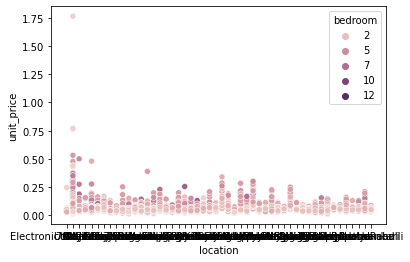

In [523]:
sns.scatterplot(df_5['location'],df_5['unit_price'],hue=df_5['bedroom'])

this is very difficult to understand. Plotting for different locations, selecting one location at a time will be more convinient.However, the now identiified oultilers can be removed.

In [524]:
df_5=df_5[~(df_5['unit_price']>0.5)]
df_5 = df_5[~(df_5['bedroom']>10)]
df_5.describe()

,total_sqft,bath,price,unit_price,bedroom
count,12639.000000,12639.000000,12639.000000,12639.000000,12639.000000
mean,1497.053319,2.606773,105.523550,0.065194,2.725769
std,918.819472,1.139907,129.966654,0.039342,1.106224
min,250.000000,1.000000,10.000000,0.011667,1.000000
25%,1100.000000,2.000000,49.000000,0.042451,2.000000
50%,1260.000000,2.000000,70.000000,0.053755,3.000000
75%,1640.000000,3.000000,115.000000,0.071429,3.000000
max,36000.000000,10.000000,2912.000000,0.500000,10.000000


In [525]:
df_5.shape

(12639, 6)

In [526]:
def plot_scatter(df,location,a,b):
    r1=df[(df['location']==location) & (df['bedroom']==a)]
    r2=df[(df['location']==location) & (df['bedroom']==b)]
    sns.scatterplot(r1['total_sqft'],r1['price'],color='blue',label=f'{a} BHK',s=50)
    sns.scatterplot(r2['total_sqft'],r2['price'],color='green',label=f'{b} BHK',s=50)
    #matplotlib.rcParams['figure.figsize']=(15,10)
    plt.xlabel("Total sqft area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend
    #plt.show()

In [527]:
loc[loc>150]

location
Whitefield               513
Sarjapur  Road           372
Electronic City          300
Kanakpura Road           259
Thanisandra              230
Yelahanka                206
Uttarahalli              186
Hebbal                   173
Raja Rajeshwari Nagar    168
Marathahalli             164
Name: location, dtype: int64

C:\Users\muafi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muafi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


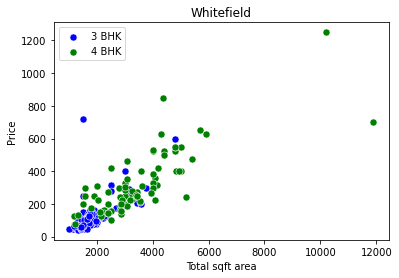

In [528]:
plot_scatter(df_5,'Whitefield',3,4)


C:\Users\muafi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muafi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


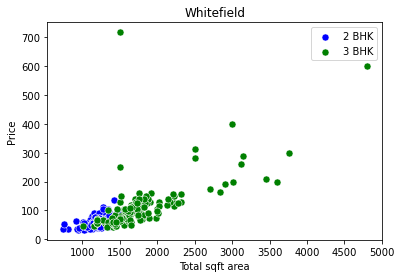

In [529]:
plot_scatter(df_5,'Whitefield',2,3)

C:\Users\muafi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\muafi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


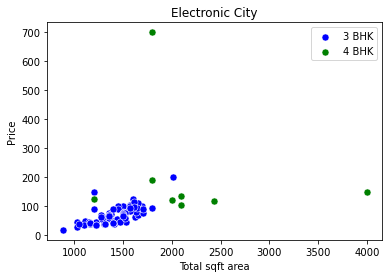

In [530]:
plot_scatter(df_5,'Electronic City',3,4)

In [531]:
#function to remove the outlierd according to the number of bedrooms.
def remove_bhk_outlier(df):
    exclude = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in df.groupby('bedroom'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df['unit_price']),
                'count':bhk_df.shape[0]
        }
    for bhk,bhk_df in location_df.groupby('bedroom'):
        stats= bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
            exclude = np.append(exclude,bhk_df[bhk_df['unit_price']<(stats['mean'])].index.values)
    return df.drop(exclude,axis='index')

In [532]:
df_5.shape

(12639, 6)

In [533]:
print(df_5.shape)
df_6 = remove_bhk_outlier(df_5)
df_6.shape

(12639, 6)


(9111, 6)

(array([4.489e+03, 3.349e+03, 7.520e+02, 3.560e+02, 1.000e+02, 4.300e+01,
        1.400e+01, 3.000e+00, 2.000e+00, 3.000e+00]),
 array([0.01166667, 0.0605    , 0.10933333, 0.15816667, 0.207     ,
        0.25583333, 0.30466667, 0.3535    , 0.40233333, 0.45116667,
        0.5       ]),
 <BarContainer object of 10 artists>)

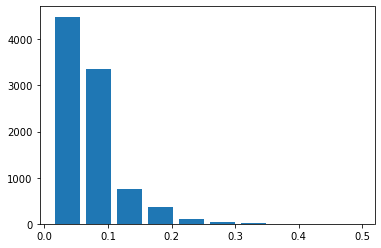

In [534]:
plt.hist(df_6['unit_price'],rwidth=0.8)

(array([7.020e+02, 4.332e+03, 2.549e+03, 9.370e+02, 3.390e+02, 1.670e+02,
        4.500e+01, 2.300e+01, 1.500e+01, 2.000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

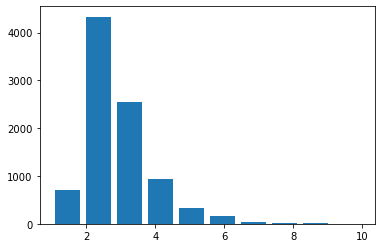

In [535]:
plt.hist(df_6['bath'],rwidth=0.8)

In [536]:
df_7 = df_6.drop(['unit_price'],axis=1)
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9111 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    9111 non-null   object 
 1   total_sqft  9111 non-null   float64
 2   bath        9111 non-null   float64
 3   price       9111 non-null   float64
 4   bedroom     9111 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 427.1+ KB


Convesion of location into numerical vector (one hot coding or dummies)

In [537]:
df_7.reset_index()
df_7.head(5)

,location,total_sqft,bath,price,bedroom
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,other,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [538]:
loc_dummies = pd.get_dummies(df_7['location'])
loc_dummies.head()

,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,Banashankari,Bannerghatta Road,Begur Road,Bellandur,Bisuvanahalli,Budigere,Chandapura,...,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [539]:
final_df = pd.concat([df_7,loc_dummies],axis=1)
final_df.reset_index()
final_df.head(3)

,location,total_sqft,bath,price,bedroom,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,Banashankari,Bannerghatta Road,...,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,39.07,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,62.00,3,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,other,1521.0,3.0,95.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [540]:
final_df.drop(['location','other'],axis=1,inplace=True)
final_df.head(3)

,total_sqft,bath,price,bedroom,7th Phase JP Nagar,8th Phase JP Nagar,Akshaya Nagar,Banashankari,Bannerghatta Road,Begur Road,...,Sarjapur,Sarjapur Road,TC Palaya,Thanisandra,Thigalarapalya,Uttarahalli,Varthur,Whitefield,Yelahanka,Yeshwanthpur
0,1056.0,2.0,39.07,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,62.00,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1521.0,3.0,95.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

In [541]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,TweedieRegressor,SGDRegressor,BayesianRidge,ARDRegression,RANSACRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor


In [542]:
X = final_df.drop(['price'],axis=1)
y = final_df['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [543]:
model = LinearRegression()
model.fit(X_train,y_train)
predicted_price = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test,predicted_price))
R2 = r2_score(y_test,predicted_price)
#score = model.score(X_test,y_test)
print(f'R2 = {R2} and RMSE= {RMSE}')
score

R2 = 0.5571048412630071 and RMSE= 88.59550384457368


0.6844180595028249

In [544]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state=0)
cross_val_score(model,X,y,cv=cv)

array([0.65020291, 0.63782457, 0.73088368, 0.6432556 , 0.62547345])

model should be improved

In [545]:
column=['Model','RSQ_train','RSQ_test','MSE','MAE','RMSE']
model_df = pd.DataFrame(columns=column)
#column = list(model_df)
models=[LinearRegression(),Ridge(),Lasso(),ElasticNet(),Lars(),LassoLars(),OrthogonalMatchingPursuit()
        ,TweedieRegressor(),SGDRegressor(),BayesianRidge(),ARDRegression(),RandomForestRegressor(),
        SVR(),LinearSVR(),KNeighborsRegressor(),GaussianProcessRegressor(),
       PLSRegression(),DecisionTreeRegressor(),RANSACRegressor(),ExtraTreesRegressor()]
model_names = ['Linear Regression','Ridge','Lasso','Elastic Net','Lars','Lasso LARSs','Orthogonal Matching Pursuit',
               'Tweedie Regressor','SGD Regressor','Bayesian Ridge','ARD Regression','Random Forest Regression',
               'SVR','Linear SVR','K Neighbors Regressor','Gaussian Process Regressor',
               'PLS Regression','Decision Tree Regressor','RANSAC Regressor','Extra Trees Regressor']
for model,name in zip(models,model_names):
    model.fit(X_train,y_train)
    ytest_pred = model.predict(X_test)
    ytrain_pred = model.predict(X_train)
    mse=mean_squared_error(y_test,ytest_pred)
    rsq_test=r2_score(y_test,ytest_pred)
    rsq_train = r2_score(y_train,ytrain_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,ytest_pred)
    values = [name, rsq_train,rsq_test,mse, mae,rmse]
    new_raw = dict(zip(column,values))
    model_df=model_df.append(new_raw,ignore_index=True)

model_df.to_csv("BHP.csv")   
model_df

C:\Users\muafi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


,Model,RSQ_train,RSQ_test,MSE,MAE,RMSE
0,Linear Regression,6.820732e-01,5.571048e-01,7.849163e+03,4.478430e+01,8.859550e+01
1,Ridge,6.820473e-01,5.571738e-01,7.847941e+03,4.467893e+01,8.858861e+01
2,Lasso,6.375417e-01,5.121452e-01,8.645955e+03,4.879476e+01,9.298363e+01
3,Elastic Net,6.340288e-01,5.073737e-01,8.730518e+03,4.899863e+01,9.343724e+01
4,Lars,6.820732e-01,5.571048e-01,7.849163e+03,4.478430e+01,8.859550e+01
5,Lasso LARSs,2.969036e-01,2.771316e-01,1.281096e+04,6.034409e+01,1.131855e+02
6,Orthogonal Matching Pursuit,6.492013e-01,5.185219e-01,8.532945e+03,4.798171e+01,9.237394e+01
7,Tweedie Regressor,6.334929e-01,5.051832e-01,8.769339e+03,4.905261e+01,9.364475e+01
8,SGD Regressor,-2.365295e+25,-2.827593e+25,5.011172e+29,6.199114e+14,7.078963e+14
9,Bayesian Ridge,6.819296e-01,5.571715e-01,7.847981e+03,4.454788e+01,8.858883e+01
